We're going to recycle some of the code here from pls-balances

In [1]:
import pandas as pd
from biom import load_table
import matplotlib.pyplot as plt
import numpy as np
from skbio import TreeNode
import seaborn as sns
from skbio.stats.composition import closure

%matplotlib inline
sns.set_style('ticks')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

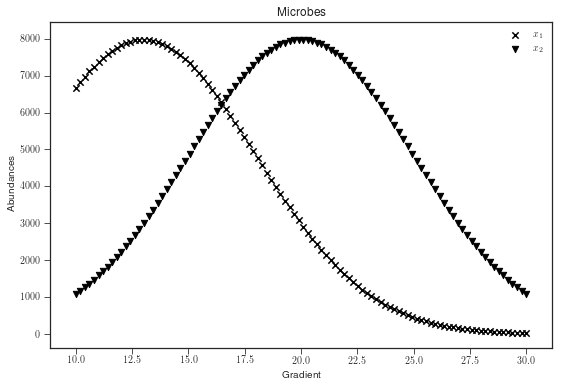

In [2]:
from pls_balances.src.sim import chain_interactions

gradient = np.linspace(10, 30, 100)
mu = np.array([13, 20])
sigma = np.array([5]*len(mu))
scale = 100000
microbial_truth = chain_interactions(gradient, mu, sigma) * scale
microbial_truth = np.round(microbial_truth)
# Plot the microbial abundances over time
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(gradient, microbial_truth[:, 0], label=r'$x_1$', c='k', marker='x', s=40)
ax.scatter(gradient, microbial_truth[:, 1], label=r'$x_2$', c='k', marker='v', s=40)

ax.set_title('Microbes')
ax.set_ylabel('Abundances')
ax.set_xlabel('Gradient')
ax.legend()

In [3]:
from skbio.stats import subsample_counts
from scipy.stats import dirichlet

n1=1000
n2=100
alpha=1

# Step 1: Sample from ground truth
microbial_table = np.apply_along_axis(lambda p: np.random.multinomial(n1, p),
                                      1, closure(microbial_truth))

# Step 2: Sample from multinomial
microbial_multinomial = np.apply_along_axis(lambda p: np.random.multinomial(n2, p),
                                            1, closure(microbial_table))
microbial_rarefied = np.apply_along_axis(lambda x: subsample_counts(x.astype(np.int), n2),
                                         1, microbial_table)
microbial_dirichlet = np.apply_along_axis(lambda p: np.ravel(dirichlet.rvs(np.ravel(p)+alpha)),
                                          1, microbial_table)                                       

In [4]:
def prettify_legend(ax):
    # Helper function for making axes pretty
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

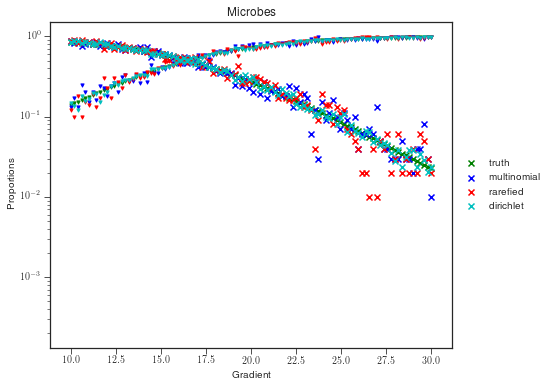

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
microbial_table = closure(microbial_truth)
microbial_multinomial = closure(microbial_multinomial)
microbial_rarefied = closure(microbial_rarefied)

ax.scatter(gradient, microbial_table[:, 0], label='truth', c='g', marker='x')
ax.scatter(gradient, microbial_table[:, 1], c='g', marker='v', s=10)

ax.scatter(gradient, microbial_multinomial[:, 0], label='multinomial', c='b', marker='x')
ax.scatter(gradient, microbial_multinomial[:, 1], c='b', marker='v', s=10)

ax.scatter(gradient, microbial_rarefied[:, 0], label='rarefied', c='r', marker='x')
ax.scatter(gradient, microbial_rarefied[:, 1], c='r', marker='v', s=10)

ax.scatter(gradient, microbial_dirichlet[:, 0], label='dirichlet', c='c', marker='x')
ax.scatter(gradient, microbial_dirichlet[:, 1], c='c', marker='v', s=10)

ax.set_title('Microbes')
ax.set_ylabel('Proportions')
ax.set_xlabel('Gradient')
ax.legend(loc='best')
ax.set_yscale('log')
prettify_legend(ax)